<a href="https://colab.research.google.com/github/gustavolq/Projetos/blob/main/SUS-SC-Analise/Analise_SUS_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados do SUS de Santa Catarina**

[![GitHub](https://img.shields.io/badge/GitHub-gustavolq-blue.svg)](https://github.com/gustavolq)
[![Linkedin](https://img.shields.io/badge/Linkedin-gustavoquadra-blue.svg)](https://www.linkedin.com/in/gustavoquadra/)

<p align="left">
  <img src = "https://blog.jaleko.com.br/wp-content/uploads/2018/11/jaleko-sus-810x693.png" width="400" height="300">
  <img src = "https://upload.wikimedia.org/wikipedia/commons/1/10/Bandeira_de_Santa_Catarina.png" width="400" height="300">
</p>

Olá! Meu nome é Gustavo Luiz de Quadra e seja muito bem-vindo ao meu projeto referente ao **Módulo 01 - Python e Pandas para Análise de Dados Reais** do Bootcamp de Data Science Aplicada da [Alura](https://www.alura.com.br/)!

**Sumário do Projeto**

**1.** Introdução

**2.** Definição do Problema de Negócio

**3.** Preparação dos Dados

**4.** Análise Exploratória dos Dados

**5.** Criação de Hipóteses

**6.** Conclusão

**7.** Agradecimentos

##**1. Introdução**

O projeto do primeiro módulo do Bootcamp de Data Science Aplicada foi proposto pelos professores da Alura, tendo como objetivo a análise de dados, diferentes dos que foram tratados nas aulas, do SUS.

###**1.1 Mas afinal, o que é o SUS?**

**Sistema Único de Saúde (SUS)** é a denominação do sistema público de saúde brasileiro criado pela Constituição Federal de 1988. 

O SUS realiza desde **atendimentos primários até procedimentos complexos** e oferece **atendimento de emergência** para pessoas que sofrem acidentes pelo Serviço de Atendimento Móvel de Urgência (SAMU). O sistema de saúde brasileiro também **fornece vacinas e remédios gratuitamente** para pessoas com diversas doenças, financia pesquisas na área de epidemiologia e fiscaliza a qualidade dos alimentos oferecidos em estabelecimentos comercias por meio da Agência Nacional de Vigilância Sanitária (Anvisa).

Com o advento do SUS, **toda** a população brasileira passou a ter direito à saúde universal e gratuita, financiada com recursos provenientes dos orçamentos da União, dos Estados, do Distrito Federal e dos Municípios. 

Fazem parte do Sistema Único de Saúde, os centros e postos de saúde, os hospitais públicos, os laboratórios e hemocentros (bancos de sangue), os serviços de vigilância sanitária, epidemiológica, ambiental, além de fundações e institutos de pesquisa acadêmica e científica, como a Fundação Oswaldo Cruz (FIOCRUZ) e o Instituto Vital Brazil.

**Entre os países com mais de 200 milhões de habitantes, o Brasil é o único que possui um sistema de saúde pública universal**.

##**2. Definição do Problema de Negócio**

Neste projeto, utilizaremos **4 (quatro) conjuntos de dados** retirados das informações de saúde do DataSUS, que contém os valores de **Valor Total Gasto no SUS**, **Obitos**, **Internações** e **População** entre 2008-2020 dos municípios de Santa Catarina.

###**O que é o DataSUS?**

Datasus é o **departamento de informática do Sistema Único de Saúde do Brasil** que possui a responsabilidade de coletar, processar e disseminar informações sobre saúde.

O Datasus administra informações de saúde e informações financeiras, sendo responsável, também, pelos sistemas e aplicativos necessários para o registro e processamento de informações de saúde, como por exemplo, o Cadastro Nacional de Estabelecimentos de Saúde (CNES), que contém todas as informações sobre a base instalada para o atendimento à população. 

Caso você queira realizar a verificação dos dados, pode-se utilizar o local de [informações da saúde (TABNET)](http://www2.datasus.gov.br/DATASUS/index.php?area=02)

###**2.1 Objetivo do Projeto**

Como objetivo do projeto, realizaremos a **análise dos indicadores do SUS dos munícipios de Santa Catarina para identificar correlações e formulações e respostas de hipóteses.**

##**3. Preparação dos Dados**

###**3.1 Importação dos Pacotes Utilizados**

A importação dos pacotes é um passo para podermos utilizar comandos para situações específicas, como carregamento dos dados e criação dos gráficos.

Entende-se como pacote um conjunto de funções escritos em uma linguagem de programação.

In [4]:
# Pacote para o carregamento de dados
import pandas as pd
pd.options.display.float_format = "{:.2f}".format

# Pacote para geração de gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as lines
import seaborn as sns
sns.set() # Setar a utilização do seaborn para demonstração do gráfico

### **3.2 Importando os Dados**

Para realizar a importação dos dados, utilizaremos a função ```pd.read_csv``` do pacote ```pandas``` que importamos anteriormente.

Esses dados estão armazenados no meu repositório do GitHub, onde você pode verificar clicando [aqui](https://github.com/gustavolq/Bootcamp-DataScience-Alura/tree/main/Modulo_01/Projeto/Dados).

In [5]:
url_dados_populacao = "https://github.com/gustavolq/Projetos/raw/main/SUS-SC-Analise/Dados/Populacao_SC-2008-2020.csv"
url_dados_internacoes = "https://github.com/gustavolq/Projetos/raw/main/SUS-SC-Analise/Dados/Internacoes_SC-2008-2021.csv"
url_dados_obitos = "https://github.com/gustavolq/Projetos/raw/main/SUS-SC-Analise/Dados/Obitos_SC-2008-2021.csv"
url_dados_gastos = "https://github.com/gustavolq/Projetos/raw/main/SUS-SC-Analise/Dados/Valor_Total_SC-2008-2021.csv"

dados_populacao   = pd.read_csv(url_dados_populacao, encoding="ISO-8859-1", sep = ";",   skiprows=4, skipfooter= 4, engine = "python", thousands = ".", decimal = ",")
dados_internacoes = pd.read_csv(url_dados_internacoes, encoding="ISO-8859-1", sep = ";", skiprows = 3, skipfooter = 12, engine = "python", thousands = ".", decimal = ",")
dados_obitos      = pd.read_csv(url_dados_obitos, encoding="ISO-8859-1", sep = ";", skiprows = 3, skipfooter = 12, engine = "python", thousands = ".", decimal = ",")
dados_gastos      = pd.read_csv(url_dados_gastos, encoding="ISO-8859-1", sep = ";", skiprows = 3, skipfooter= 12, engine = "python", thousands = ".", decimal = ",")

####**3.2.1 Dados Valor Total Gastos no SUS**

Conforme verificado com os comandos abaixo, possuímos **170 linhas** e **161 colunas** em nossa tabela de dados gastos no SUS de SC.

Possuímos 1 coluna para o Município de Santa Catarina e 160 colunas para representar o ano (2008-2020) e mês (Jan-Dez) do dado coletado.

In [6]:
print(f'A tabela de gastos no SUS de Santa Catarina possui {dados_gastos.shape[0]} linhas e {dados_gastos.shape[1]} colunas.')

# Para fins de melhor exemplificação da tabela iremos retornar apenas as 5 primeiras linhas.
dados_gastos.head()

A tabela de gastos no SUS de Santa Catarina possui 170 linhas e 161 colunas.


,Município,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,420010 Abelardo Luz,25586.54,42535.54,41914.12,41547.10,51968.19,52299.80,55697.38,57009.22,54160.58,56313.67,55096.65,54955.06,48740.60,52857.48,53540.24,56484.82,53333.43,51959.41,54643.39,57683.04,51345.20,49740.84,53538.50,49082.11,51943.72,51963.62,54475.81,47710.33,54055.43,54508.65,61868.91,58827.63,60548.52,60327.01,55862.72,79673.70,62951.93,59642.95,57862.89,...,51690.53,17957.23,105402.76,57485.91,108095.81,121262.78,83105.44,95906.89,120868.54,127051.10,101584.53,99128.03,93959.87,119226.99,148371.76,124512.03,162328.04,128183.33,159872.56,59480.51,182240.77,174712.55,116666.77,120507.37,147077.90,110196.44,110849.42,35614.57,23018.31,11420.00,31607.29,27975.36,23260.83,6125.74,151569.44,119009.65,27811.51,65012.27,84151.11,11145890.29
1,420020 Agrolândia,10228.78,19844.99,13057.09,13178.41,13028.00,14055.49,14798.16,13752.35,15875.91,13682.32,15227.82,14786.66,15636.41,12776.97,15663.23,14029.96,16287.98,18407.41,14895.36,16329.89,14686.91,14915.93,13483.67,13955.95,13979.31,12291.57,14630.50,16435.66,15346.46,13311.97,12657.83,13348.90,14455.23,13387.64,14379.02,13489.77,11375.12,13194.41,15808.12,...,4696.47,10306.57,7930.55,13269.85,10546.81,9560.40,11404.40,13704.56,16322.62,7979.27,10754.88,19883.81,23235.58,20032.36,-,-,13331.12,10456.51,11180.32,7628.12,11710.70,6434.90,6321.70,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1963567.84
2,420040 Água Doce,10809.42,11202.49,8246.92,11024.27,13235.32,10255.50,13722.39,10134.02,16159.60,12061.39,15611.11,13339.97,11250.10,10459.71,10695.79,12256.34,15947.14,12870.80,10041.53,14648.44,14047.24,13423.68,12779.52,10927.57,13701.39,9918.92,7364.02,12475.68,9790.24,13307.24,6838.94,15810.24,10282.57,14530.34,10775.57,15217.03,8520.84,12355.11,13747.47,...,35947.75,11918.81,24390.95,22155.55,16596.81,25558.58,19659.76,28067.75,25197.18,40767.03,35267.83,23743.86,26288.97,19327.34,21283.10,17628.05,24579.36,26266.84,32855.97,24913.77,24916.77,23778.78,12995.49,17612.81,22566.36,11577.52,16688.97,12831.58,10852.37,13627.03,7187.45,7442.66,9055.73,9583.99,13769.54,11412.37,10496.62,11897.59,40114.67,2657440.34
3,420070 Alfredo Wagner,18708.51,20226.56,13315.44,19502.11,15535.26,8560.96,10920.15,12591.34,11533.73,9310.72,12106.27,17305.70,16701.75,18516.88,26783.42,18171.16,23357.27,13921.47,13915.63,11796.92,21477.98,30945.61,25073.85,15461.15,26548.46,15061.12,21710.14,13589.57,15188.26,19150.22,14800.41,21726.17,11760.76,17702.93,20678.06,14213.96,22664.01,14986.25,17632.10,...,22000.19,25441.62,14865.17,25398.87,23803.01,17535.17,23191.32,22464.50,20098.35,18095.43,20286.66,-,24023.41,29383.56,33592.50,17789.41,-,-,-,-,-,-,-,-,-,-,6799.08,5222.68,776.48,6410.89,-,11419.45,8275.72,1941.22,20504.37,-,-,26099.44,25147.82,2463683.71
4,420080 Anchieta,14756.75,15452.38,17753.63,16111.64,15484.16,17639.36,14827.62,19307.86,17878.65,15482.02,14767.78,19014.90,14341.01,27315.10,22294.14,22716.55,23890.52,19490.41,23073.44,21650.46,21702.88,20524.32,15432.63,14968.25,-,22544.77,15360.39,9704.76,18818.01,20720.25,23494.44,27698.09,24228.37,24796.62,19012.80,18494.68,16754.36,17120.91,14944.05,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1370337.69


Para melhor organização e visualização, iremos realizar a remoção dos números e do espaço antes de cada valor da coluna ```Município``` e a transformaremos no índice nessa tabela de dados para facilitar a busca da linha de cada município.

In [7]:
dados_gastos['Município'] = dados_gastos['Município'].str.replace('\d+', '')
dados_gastos['Município'] = dados_gastos['Município'].str.lstrip()
dados_gastos.set_index('Município', inplace = True)

Também iremos realizar a alteração dos valores "-" (representação de quando o valor não é informado) por 0 e transformaremos as colunas em numéricas.

In [8]:
for data in dados_gastos.drop('Total', axis = 1).columns :
  dados_gastos[data] = dados_gastos[data].str.replace("-", "0")
  dados_gastos[data] = dados_gastos[data].astype('float64')

Visto que a nossa tabela também apresenta dados de 2021 (Jan, Fev, Mar) iremos realizar a remoção e trabalharmos apenas até Dezembro de 2020.

Após isso, também teremos que realizar a alteração da coluna ```Total```, visto que iremos realizar a remoção de valores de 2021 e devemos somar novamente para termos o total.

In [9]:
dados_gastos.drop(['2021/Jan', '2021/Fev', '2021/Mar'], axis = 1, inplace=True)

In [10]:
dados_gastos['Total'] = [round(dados_gastos.loc[x].drop('Total').sum(),2) for x in dados_gastos.index]

Após realizar essas mudanças, podemos verificar novamente a quantidade de linhas e colunas, onde notamos que agora possuímos 157 colunas ao invés de 161.

Isso ocorreu porque transformamos a antiga coluna ```Município``` em nosso indíce e realizamos a remoção das colunas de 2021.

In [11]:
print(f'A tabela de gastos no SUS de Santa Catarina possui {dados_gastos.shape[0]} linhas e {dados_gastos.shape[1]} colunas.')

# Para fins de melhor exemplificação da tabela iremos retornar apenas as 5 primeiras linhas.
dados_gastos.head()

A tabela de gastos no SUS de Santa Catarina possui 170 linhas e 157 colunas.


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abelardo Luz,25586.54,42535.54,41914.12,41547.10,51968.19,52299.80,55697.38,57009.22,54160.58,56313.67,55096.65,54955.06,48740.60,52857.48,53540.24,56484.82,53333.43,51959.41,54643.39,57683.04,51345.20,49740.84,53538.50,49082.11,51943.72,51963.62,54475.81,47710.33,54055.43,54508.65,61868.91,58827.63,60548.52,60327.01,55862.72,79673.70,62951.93,59642.95,57862.89,62742.88,...,59186.47,49962.58,64879.16,51690.53,17957.23,105402.76,57485.91,108095.81,121262.78,83105.44,95906.89,120868.54,127051.10,101584.53,99128.03,93959.87,119226.99,148371.76,124512.03,162328.04,128183.33,159872.56,59480.51,182240.77,174712.55,116666.77,120507.37,147077.90,110196.44,110849.42,35614.57,23018.31,11420.00,31607.29,27975.36,23260.83,6125.74,151569.44,119009.65,10968915.40
Agrolândia,10228.78,19844.99,13057.09,13178.41,13028.00,14055.49,14798.16,13752.35,15875.91,13682.32,15227.82,14786.66,15636.41,12776.97,15663.23,14029.96,16287.98,18407.41,14895.36,16329.89,14686.91,14915.93,13483.67,13955.95,13979.31,12291.57,14630.50,16435.66,15346.46,13311.97,12657.83,13348.90,14455.23,13387.64,14379.02,13489.77,11375.12,13194.41,15808.12,14734.72,...,28355.26,16296.37,7796.86,4696.47,10306.57,7930.55,13269.85,10546.81,9560.40,11404.40,13704.56,16322.62,7979.27,10754.88,19883.81,23235.58,20032.36,0.00,0.00,13331.12,10456.51,11180.32,7628.12,11710.70,6434.90,6321.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1963567.84
Água Doce,10809.42,11202.49,8246.92,11024.27,13235.32,10255.50,13722.39,10134.02,16159.60,12061.39,15611.11,13339.97,11250.10,10459.71,10695.79,12256.34,15947.14,12870.80,10041.53,14648.44,14047.24,13423.68,12779.52,10927.57,13701.39,9918.92,7364.02,12475.68,9790.24,13307.24,6838.94,15810.24,10282.57,14530.34,10775.57,15217.03,8520.84,12355.11,13747.47,10677.86,...,16095.65,35405.69,22573.33,35947.75,11918.81,24390.95,22155.55,16596.81,25558.58,19659.76,28067.75,25197.18,40767.03,35267.83,23743.86,26288.97,19327.34,21283.10,17628.05,24579.36,26266.84,32855.97,24913.77,24916.77,23778.78,12995.49,17612.81,22566.36,11577.52,16688.97,12831.58,10852.37,13627.03,7187.45,7442.66,9055.73,9583.99,13769.54,11412.37,2594931.46
Alfredo Wagner,18708.51,20226.56,13315.44,19502.11,15535.26,8560.96,10920.15,12591.34,11533.73,9310.72,12106.27,17305.70,16701.75,18516.88,26783.42,18171.16,23357.27,13921.47,13915.63,11796.92,21477.98,30945.61,25073.85,15461.15,26548.46,15061.12,21710.14,13589.57,15188.26,19150.22,14800.41,21726.17,11760.76,17702.93,20678.06,14213.96,22664.01,14986.25,17632.10,25066.08,...,33297.97,26558.70,17033.44,22000.19,25441.62,14865.17,25398.87,23803.01,17535.17,23191.32,22464.50,20098.35,18095.43,20286.66,0.00,24023.41,29383.56,33592.50,17789.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6799.08,5222.68,776.48,6410.89,0.00,11419.45,8275.72,1941.22,20504.37,0.00,2412436.45
Anchieta,14756.75,15452.38,17753.63,16111.64,15484.16,17639.36,14827.62,19307.86,17878.65,15482.02,14767.78,19014.90,14341.01,27315.10,22294.14,22716.55,23890.52,19490.41,23073.44,21650.46,21702.88,20524.32,15432.63,14968.25,0.00,22544.77,15360.39,9704.76,18818.01,20720.25,23494.44,27698.09,24228.37,24796.62,19012.80,18494.68,16754.36,17120.91,14944.

####**3.2.2 Dados População**

Conforme verificado com os comandos abaixo, possuímos 296 linhas e 14 colunas em nossa tabela de dados gastos no SUS de SC.

Possuímos 1 coluna para o município e 13 colunas para os anos de 2008-2020.

**Mas Gustavo, por que temos 296 linhas e não 170 igual à tabela de gastos?**

Bom, essa é uma questão que provavelmente deveria ser verificada com o responsável pela coleta dos dados dos municípios de Santa Catarina. 

Visto que possuímos 170 na tabela de gastos, iremos realizar a remoção dos munícipios que não estão presente.

In [12]:
print(f'A tabela de população dos municípios de Santa Catarina possui {dados_populacao.shape[0]} linhas e {dados_populacao.shape[1]} colunas.')

# Para fins de melhor exemplificação da tabela iremos retornar apenas as 5 primeiras linhas.
dados_populacao.head()

A tabela de população dos municípios de Santa Catarina possui 296 linhas e 14 colunas.


,Município,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,420005 Abdon Batista,2725,2711,2697,2682,2668,2653,2638,2623,2607,2592,2577,2563,2548
1,420010 Abelardo Luz,17277,17332,17386,17442,17500,17557,17614,17673,17731,17789,17847,17904,17960
2,420020 Agrolândia,9188,9334,9479,9630,9782,9935,10088,10245,10402,10557,10711,10864,11013
3,420030 Agronômica,4863,4925,4986,5050,5096,5161,5226,5293,5358,5423,5385,5448,5509
4,420040 Água Doce,7064,7071,7078,7085,7093,7100,7108,7115,7123,7130,7138,7145,7152


Para essa tabela, também iremos realizar a remoção dos números e do espaço antes de cada valor da coluna ```Município``` e a transformaremos no índice nessa tabela de dados para facilitar a busca da linha de cada município.

In [13]:
dados_populacao['Município'] = dados_populacao['Município'].str.replace('\d+', '')
dados_populacao['Município'] = dados_populacao['Município'].str.lstrip()
dados_populacao.set_index('Município', inplace = True)

Conforme foi comentado anteriormente, abaixo realizamos a remoção dos municípios que não estão presentes em nossa tabela de gastos.

In [14]:
dados_populacao.drop([x for x in dados_populacao.index if x not in dados_gastos.index], inplace = True)

Após a remoção dos municípios, devemos realizar novamente a soma do nosso valor Total da população.

In [15]:
for ano in dados_populacao.columns :
  dados_populacao[ano] = dados_populacao[ano].astype('int')
  dados_populacao.loc['Total', ano] = dados_populacao[ano].drop('Total').sum()

Conforme podemos verificar abaixo, agora possuímos a mesma quantidade de linhas que a tabela de gastos com **170** ocorrências.

In [16]:
print(f'A tabela de população dos municípios de Santa Catarina possui {dados_populacao.shape[0]} linhas e {dados_populacao.shape[1]} colunas.')

dados_populacao.head()

A tabela de população dos municípios de Santa Catarina possui 170 linhas e 13 colunas.


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Município,,,,,,,,,,,,,
Abelardo Luz,17277,17332,17386,17442,17500,17557,17614,17673,17731,17789,17847,17904,17960
Agrolândia,9188,9334,9479,9630,9782,9935,10088,10245,10402,10557,10711,10864,11013
Água Doce,7064,7071,7078,7085,7093,7100,7108,7115,7123,7130,7138,7145,7152
Alfredo Wagner,9470,9519,9568,9619,9671,9722,9774,9827,9880,9932,9984,10036,10086
Anchieta,6647,6567,6487,6404,6224,6141,6059,5973,5888,5804,5721,5638,5557


####**3.2.3 Dados de Óbitos**

Para a nossa tabela de óbitos possuímos **168 linhas** (possuímos 2 municípios que estão na tabela de gastos e não estão na tabela de óbitos) e **161 colunas**.

Possuímos 1 coluna para o Município de Santa Catarina e 160 colunas para representar o ano (2008-2020) e mês (Jan-Dez) do dado coletado.

In [17]:
print(f'A tabela de óbitos dos municípios de Santa Catarina possui {dados_obitos.shape[0]} linhas e {dados_obitos.shape[1]} colunas.')

# Para fins de melhor exemplificação da tabela iremos retornar apenas as 5 primeiras linhas.
dados_obitos.head()

A tabela de óbitos dos municípios de Santa Catarina possui 168 linhas e 161 colunas.


,Município,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,420010 Abelardo Luz,-,-,-,2,1,1,1,-,-,-,-,1,1,1,2,1,-,1,1,1,1,2,-,-,-,1,2,-,-,2,-,1,2,1,-,3,1,1,1,...,3,-,6,3,1,2,1,2,-,1,3,1,4,1,3,5,1,1,-,1,1,3,1,4,1,2,2,1,1,-,5,4,4,-,2,4,-,6,2,280
1,420020 Agrolândia,-,1,1,-,-,-,-,-,-,-,-,1,2,-,-,-,-,1,-,2,-,1,1,-,-,1,-,2,-,2,-,-,-,-,-,1,1,2,-,...,-,1,-,1,2,1,-,1,2,1,-,1,-,2,-,-,1,-,1,-,2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,93
2,420040 Água Doce,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,1,1,-,1,-,1,1,-,-,-,-,-,-,-,-,-,1,-,-,-,1,1,1,...,1,-,-,-,-,3,-,1,-,-,-,-,-,-,-,-,1,-,1,-,-,-,-,-,-,-,1,-,-,1,-,-,-,1,-,-,-,-,7,75
3,420070 Alfredo Wagner,-,-,-,-,-,-,-,1,-,-,-,-,1,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,1,1,2,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,3,-,-,-,3,1,-,-,-,-,1,2,66
4,420080 Anchieta,-,1,-,1,1,1,2,-,1,-,-,-,2,3,2,1,-,2,1,-,-,3,1,-,-,2,-,2,1,1,-,1,-,1,-,-,-,4,1,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,69


Conforme realizado com as outras tabelas, iremos realizar os ajustes necessários e informar que queremos que a coluna ```Município``` seja o nosso índice.

In [18]:
dados_obitos['Município'] = dados_obitos['Município'].str.replace('\d+', '')
dados_obitos['Município'] = dados_obitos['Município'].str.lstrip()
dados_obitos.set_index('Município', inplace = True)

Visto que possuímos valores "-", iremos realizar a alteração do mesmo para 0 (conforme verificado na legenda no TABNET ao realizar a verificação dos dados).

In [19]:
for data in dados_obitos.drop('Total', axis = 1).columns :
  dados_obitos[data] = dados_obitos[data].str.replace("-", "0")
  dados_obitos[data] = dados_obitos[data].astype('int')

Iremos realizar a remoção dos valores de 2021 para trabalharmos apenas com os dados até 2020 e realizaremos novamente a soma para inserir na coluna ```Total```.

In [20]:
dados_obitos.drop(['2021/Jan', '2021/Fev', '2021/Mar'], axis = 1, inplace=True)
dados_obitos['Total'] = [round(dados_obitos.loc[x].drop('Total').sum(),2) for x in dados_obitos.index]

Conforme podemos verificar abaixo, os municípios Ibicaré e Witmarsum não estão presentes na tabela de óbitos, apenas na tabela de gastos.

Também podemos verificar que todos os municípios da tabela de obitos estão presentes na tabela de gastos.

In [21]:
print(f' Os municípios {" e ".join([x for x in dados_gastos.index if x not in dados_obitos.index])} estão na tabela de gastos e não estão presentes na tabela de óbitos.') 
print(f' Possuímos {len([x for x in dados_obitos.index if x not in dados_gastos.index])} municípios diferentes da tabela de gastos.')

 Os municípios Ibicaré e Witmarsum estão na tabela de gastos e não estão presentes na tabela de óbitos.
 Possuímos 0 municípios diferentes da tabela de gastos.


In [22]:
dados_obitos.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abelardo Luz,0,0,0,2,1,1,1,0,0,0,0,1,1,1,2,1,0,1,1,1,1,2,0,0,0,1,2,0,0,2,0,1,2,1,0,3,1,1,1,0,...,3,2,2,3,0,6,3,1,2,1,2,0,1,3,1,4,1,3,5,1,1,0,1,1,3,1,4,1,2,2,1,1,0,5,4,4,0,2,4,272
Agrolândia,0,1,1,0,0,0,0,0,0,0,0,1,2,0,0,0,0,1,0,2,0,1,1,0,0,1,0,2,0,2,0,0,0,0,0,1,1,2,0,0,...,1,0,1,0,1,0,1,2,1,0,1,2,1,0,1,0,2,0,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93
Água Doce,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,...,0,0,3,1,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,68
Alfredo Wagner,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,1,0,0,0,63
Anchieta,0,1,0,1,1,1,2,0,1,0,0,0,2,3,2,1,0,2,1,0,0,3,1,0,0,2,0,2,1,1,0,1,0,1,0,0,0,4,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69


####**3.2.4 Dados de Internações**

Conforme podemos verificar abaixo, possuímos 170 linhas e 161 colunas para a tabela de internações.

Iremos realizar as mesmas alterações e transformações na tabela de óbitos para a tabela de internações.

In [23]:
print(f'A tabela de internações dos municípios de Santa Catarina possui {dados_internacoes.shape[0]} linhas e {dados_internacoes.shape[1]} colunas.')

dados_internacoes.head()

A tabela de internações dos municípios de Santa Catarina possui 170 linhas e 161 colunas.


,Município,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,420010 Abelardo Luz,55,83,86,84,107,103,108,104,105,106,111,101,91,94,99,101,94,91,96,98,88,87,94,87,94,88,95,85,90,91,111,96,107,106,96,141,111,110,105,...,115,31,251,116,163,181,143,143,148,170,152,124,116,150,208,195,219,223,226,133,247,220,163,195,210,167,158,84,58,27,76,74,68,18,161,169,50,152,110,19241
1,420020 Agrolândia,22,45,30,29,29,30,34,32,32,35,37,33,36,33,36,34,34,38,32,35,31,33,33,37,34,34,34,35,35,33,34,33,35,29,34,31,34,30,37,...,8,20,18,28,25,21,28,26,35,14,23,39,50,43,-,-,38,33,25,14,24,13,13,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,4231
2,420040 Água Doce,30,32,29,30,32,30,32,34,33,29,35,34,31,28,30,32,36,28,30,32,33,34,31,27,34,21,15,32,19,25,17,30,31,30,23,27,20,23,31,...,105,39,80,66,55,73,57,72,77,134,116,84,92,76,78,55,76,79,105,82,85,77,46,59,68,36,52,40,26,36,22,23,31,31,45,36,35,38,55,7137
3,420070 Alfredo Wagner,58,57,41,54,52,26,30,35,35,26,34,49,47,55,67,65,78,36,36,37,57,78,71,44,80,44,64,41,45,46,43,54,30,47,58,41,61,40,43,...,51,61,37,67,56,49,60,57,53,48,55,-,59,86,83,50,-,-,-,-,-,-,-,-,-,-,23,15,2,24,-,29,20,5,54,-,-,63,74,6512
4,420080 Anchieta,37,27,36,26,26,29,26,31,33,26,28,31,20,38,32,35,38,28,34,31,31,29,21,21,-,35,22,14,28,33,38,46,39,38,33,32,27,26,22,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2264


In [24]:
dados_internacoes['Município'] = dados_internacoes['Município'].str.replace('\d+', '')
dados_internacoes['Município'] = dados_internacoes['Município'].str.lstrip()
dados_internacoes.set_index('Município', inplace = True)

In [25]:
for data in dados_internacoes.drop('Total', axis = 1).columns :
  dados_internacoes[data] = dados_internacoes[data].str.replace("-", "0")
  dados_internacoes[data] = dados_internacoes[data].astype('int')

In [26]:
dados_internacoes.drop(['2021/Jan', '2021/Fev', '2021/Mar'], axis = 1, inplace=True)
dados_internacoes['Total'] = [round(dados_internacoes.loc[x].drop('Total').sum(),2) for x in dados_internacoes.index]

In [27]:
dados_internacoes.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,Total
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abelardo Luz,55,83,86,84,107,103,108,104,105,106,111,101,91,94,99,101,94,91,96,98,88,87,94,87,94,88,95,85,90,91,111,96,107,106,96,141,111,110,105,115,...,122,117,130,115,31,251,116,163,181,143,143,148,170,152,124,116,150,208,195,219,223,226,133,247,220,163,195,210,167,158,84,58,27,76,74,68,18,161,169,18929
Agrolândia,22,45,30,29,29,30,34,32,32,35,37,33,36,33,36,34,34,38,32,35,31,33,33,37,34,34,34,35,35,33,34,33,35,29,34,31,34,30,37,32,...,56,28,15,8,20,18,28,25,21,28,26,35,14,23,39,50,43,0,0,38,33,25,14,24,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,4231
Água Doce,30,32,29,30,32,30,32,34,33,29,35,34,31,28,30,32,36,28,30,32,33,34,31,27,34,21,15,32,19,25,17,30,31,30,23,27,20,23,31,22,...,45,99,64,105,39,80,66,55,73,57,72,77,134,116,84,92,76,78,55,76,79,105,82,85,77,46,59,68,36,52,40,26,36,22,23,31,31,45,36,7009
Alfredo Wagner,58,57,41,54,52,26,30,35,35,26,34,49,47,55,67,65,78,36,36,37,57,78,71,44,80,44,64,41,45,46,43,54,30,47,58,41,61,40,43,60,...,87,63,40,51,61,37,67,56,49,60,57,53,48,55,0,59,86,83,50,0,0,0,0,0,0,0,0,0,0,23,15,2,24,0,29,20,5,54,0,6375
Anchieta,37,27,36,26,26,29,26,31,33,26,28,31,20,38,32,35,38,28,34,31,31,29,21,21,0,35,22,14,28,33,38,46,39,38,33,32,27,26,22,18,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2264


In [28]:
print(f' Possuímos {len([x for x in dados_internacoes.index if x not in dados_gastos.index])} municípios diferentes da tabela de gastos.')

 Possuímos 0 municípios diferentes da tabela de gastos.


###**3.3 Criação das tabelas anuais e mensais**

Visto que a tabela de população se encontra com valores anuais, iremos realizar a criação de novas tabelas anuais para o "valor total gasto", "óbitos" e "internações".

**Criação da tabela anual de gastos**

In [29]:
dados_gastos_ano = []
for x in dados_populacao.columns :
  x = [dados_gastos.loc[loc][dados_gastos.columns[dados_gastos.columns.str.contains(x)]].sum() for loc in dados_gastos.index]
  dados_gastos_ano.append(x)
  
dados_gastos_ano = pd.DataFrame(dados_gastos_ano).T
dados_gastos_ano.columns = dados_populacao.columns
dados_gastos_ano.index = dados_gastos.index

dados_gastos_ano['Total'] = [dados_gastos_ano.loc[loc].sum() for loc in dados_gastos_ano.index]

dados_gastos_ano

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Município,,,,,,,,,,,,,,
Abelardo Luz,589083.85,632949.06,691766.05,731254.53,768535.07,989233.92,886342.71,830651.98,699441.28,672329.90,1089539.55,1590062.55,797724.95,10968915.40
Agrolândia,171515.98,181069.67,167713.86,164083.66,143181.63,169192.76,175410.56,175767.76,179177.03,189763.43,136360.19,110331.31,0.00,1963567.84
Água Doce,145802.40,149347.86,140012.18,149545.12,140153.48,138859.68,238360.48,228756.81,276784.06,258994.71,309271.86,272447.25,146595.57,2594931.46
Alfredo Wagner,169616.75,236123.09,212130.06,215055.83,201778.81,202684.00,159865.13,125604.29,204071.52,286187.91,233180.29,104788.88,61349.89,2412436.45
Anchieta,198476.75,247399.71,224873.18,183288.26,169606.12,184057.38,162636.29,0.00,0.00,0.00,0.00,0.00,0.00,1370337.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Witmarsum,86425.96,89557.99,80835.44,49392.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,306211.95
Xanxerê,6821830.33,8628783.35,9070689.94,12224643.01,13281165.87,15348800.61,18521892.10,18508934.25,19622932.16,18154857.29,19443395.28,20258262.74,21215800.17,201101987.10
Xavantina,71973.58,108388.18,82776.04,94993.88,97320.33,114463.58,158368.87,208743.36,171395.27,247670.31,214538.62,146879.03,95672.96,1813184.01


####**Criação de tabela total de óbitos mensal**

Também vou realizar a criação de uma tabela para demonstrar os óbitos por mês entre os anos de 2008 à 2020.

In [30]:
dados_obitos_mes = []
mes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

for x in mes : 
  x = [dados_obitos.loc[loc][dados_obitos.columns[dados_obitos.columns.str.contains(x)]].sum() for loc in dados_obitos.index]
  dados_obitos_mes.append(x) 

dados_obitos_mes = pd.DataFrame(dados_obitos_mes).T
dados_obitos_mes.columns = mes
dados_obitos_mes.index = dados_obitos.index

In [31]:
dados_obitos_mes

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Município,,,,,,,,,,,,
Abelardo Luz,24,20,22,22,21,25,28,28,21,19,18,24
Agrolândia,7,17,7,4,7,9,5,10,7,8,4,8
Água Doce,3,4,6,2,12,8,5,6,4,7,4,7
Alfredo Wagner,2,0,3,14,7,5,5,12,3,6,5,1
Anchieta,4,12,5,7,4,7,5,4,5,8,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
Vitor Meireles,1,2,1,2,3,5,1,4,4,5,4,4
Xanxerê,394,337,340,311,394,365,380,416,430,391,334,397
Xavantina,0,0,0,3,4,5,3,2,3,2,4,4


**Criação da tabela anual de obitos**

In [32]:
dados_obitos_ano = []
for x in dados_populacao.columns :
  x = [dados_obitos.loc[loc][dados_obitos.columns[dados_obitos.columns.str.contains(x)]].sum() for loc in dados_obitos.index]
  dados_obitos_ano.append(x)
  
dados_obitos_ano = pd.DataFrame(dados_obitos_ano).T
dados_obitos_ano.columns = dados_populacao.columns
dados_obitos_ano.index = dados_obitos.index

dados_obitos_ano['Total'] = [dados_obitos_ano.loc[loc].sum() for loc in dados_obitos_ano.index]

dados_obitos_ano

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Município,,,,,,,,,,,,,,
Abelardo Luz,6,11,12,17,24,31,27,24,27,19,23,25,26,272
Agrolândia,3,7,6,8,2,9,10,6,14,12,10,6,0,93
Água Doce,0,6,1,12,3,6,13,5,5,7,5,2,3,68
Alfredo Wagner,1,2,0,1,2,1,8,11,13,12,4,1,7,63
Anchieta,7,15,8,9,10,8,12,0,0,0,0,0,0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitor Meireles,1,4,1,5,3,3,4,1,0,0,4,5,5,36
Xanxerê,224,283,293,313,261,297,345,331,317,415,468,463,479,4489
Xavantina,1,0,1,2,1,2,1,1,4,8,3,2,4,30


In [33]:
dados_internacoes_mes = []
mes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

for x in mes : 
  x = [dados_internacoes.loc[loc][dados_internacoes.columns[dados_internacoes.columns.str.contains(x)]].sum() for loc in dados_internacoes.index]
  dados_internacoes_mes.append(x) 

dados_internacoes_mes = pd.DataFrame(dados_internacoes_mes).T
dados_internacoes_mes.columns = mes
dados_internacoes_mes.index = dados_internacoes.index

In [34]:
dados_internacoes_mes

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Município,,,,,,,,,,,,
Abelardo Luz,1460,1402,1693,1522,1676,1524,1656,1563,1647,1565,1608,1613
Agrolândia,349,370,314,316,361,384,386,377,352,365,348,309
Água Doce,699,471,568,528,606,613,543,585,540,626,670,560
Alfredo Wagner,603,541,622,623,528,473,466,558,485,520,601,355
Anchieta,135,208,183,176,208,186,185,287,205,184,155,152
...,...,...,...,...,...,...,...,...,...,...,...,...
Witmarsum,58,53,49,46,50,45,43,49,51,44,48,39
Xanxerê,6967,6988,7262,7045,7366,7109,7265,7713,7509,7341,7274,7340
Xavantina,343,353,327,398,354,334,355,344,380,354,349,357


**Criação da tabela anual de internações**

In [35]:
dados_internacoes_ano = []
for x in dados_populacao.columns :
  x = [dados_internacoes.loc[loc][dados_internacoes.columns[dados_internacoes.columns.str.contains(x)]].sum() for loc in dados_internacoes.index]
  dados_internacoes_ano.append(x)
  
dados_internacoes_ano = pd.DataFrame(dados_internacoes_ano).T
dados_internacoes_ano.columns = dados_populacao.columns
dados_internacoes_ano.index = dados_internacoes.index

dados_internacoes_ano['Total'] = [dados_internacoes_ano.loc[loc].sum() for loc in dados_internacoes_ano.index]

dados_internacoes_ano

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Município,,,,,,,,,,,,,,
Abelardo Luz,1153,1120,1200,1320,1378,1558,1514,1466,1435,1483,1737,2295,1270,18929
Agrolândia,388,412,401,383,354,389,353,339,319,355,285,253,0,4231
Água Doce,380,372,304,313,297,333,603,600,771,722,958,910,446,7009
Alfredo Wagner,497,671,593,545,492,510,405,334,565,719,594,278,172,6375
Anchieta,356,358,358,290,271,328,303,0,0,0,0,0,0,2264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Witmarsum,173,163,128,111,0,0,0,0,0,0,0,0,0,575
Xanxerê,4966,5154,5272,6051,6249,6527,8077,7399,7520,7433,7743,7911,6877,87179
Xavantina,197,229,187,209,215,248,322,469,438,587,514,365,268,4248


Conforme podemos verificar abaixo, não é necessária a criação da tabela anual da população, porque a mesma se encontra anual.

In [36]:
dados_populacao

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Município,,,,,,,,,,,,,
Abelardo Luz,17277,17332,17386,17442,17500,17557,17614,17673,17731,17789,17847,17904,17960
Agrolândia,9188,9334,9479,9630,9782,9935,10088,10245,10402,10557,10711,10864,11013
Água Doce,7064,7071,7078,7085,7093,7100,7108,7115,7123,7130,7138,7145,7152
Alfredo Wagner,9470,9519,9568,9619,9671,9722,9774,9827,9880,9932,9984,10036,10086
Anchieta,6647,6567,6487,6404,6224,6141,6059,5973,5888,5804,5721,5638,5557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Witmarsum,3595,3628,3660,3694,3728,3762,3796,3832,3867,3901,3932,3965,3998
Xanxerê,43584,44229,44867,45533,46207,46879,47557,48251,48942,49625,50309,50982,51642
Xavantina,4269,4240,4211,4181,4150,4119,4089,4057,4026,3994,3963,3933,3903


###**3.4 Resumo do que foi feito**

Vimos que as nossas tabelas podiam ter diferenças, como por exemplo, número de municípios (linhas) e colunas (trabalhar apenas com ano ou mês/ano). Realizamos a padronização dos municípios e posteriormente podemos transformar mês/ano em ano.

Também realizamos a adição da coluna ```Municípios``` como **índice**, como forma de facilitar e acelerar a busca por um município específico.

Realizamos também a remoção dos valores de **2021**, pois, os dados do mesmo vão apenas de Janeiro até Março. Após essa remoção, também realizamos uma nova soma para a coluna ```Total```.

Realizamos também à criação das tabelas dos valores anuais.

##**4. Análise Exploratória dos Dados**

Nesse ponto do projeto, iremos realizar uma Análise Exploratória para buscarmos entender a disposição e as características dos dados dentro do nosso dataset.

Também realizaremos a criação de objetivos para demonstrarmos através dos gráficos.

###**4.1 Análise Exploratória Dados Gastos**

Para a análise de tabela de gastos, teremos os seguintes objetivos para serem demonstrados :

- **Demonstrar quais os municípios que mais realizaram gastos de 2008 à 2020.**
- **Demonstrar a evolução dos gastos ao longo dos meses e anos.**
- **Demonstrar a evolução dos gastos ao longo dos anos dos 10 maiores gastos.**

####**Demonstrar quais os municípios que mais realizaram gastos de 2008 à 2020.**

Conforme podemos verificar no gráfico abaixo, as cidades TOP 10 que possuem mais gastos são : 
- Joinville 
- Blumenau 
- Florianópolis 
- São José 
- Itajaí 
- Criciúma 
- Chapecó 
- Tubarão 
- Lages 
- Rio do Sul.

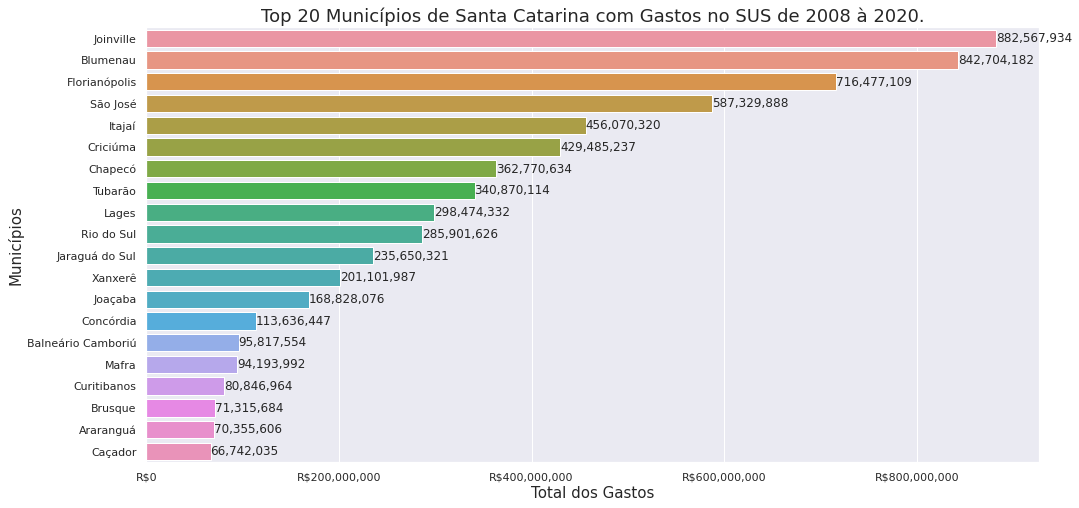

In [37]:
dados_gastos_mes_20 = dados_gastos.drop('Total').sort_values(by = 'Total', ascending = False)[:20]

plt.figure(figsize = (16,8))
ax = sns.barplot(x = 'Total' , y = dados_gastos_mes_20.index, data = dados_gastos_mes_20)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:,.0f}'.format(width), 
            ha = 'left',   
            va = 'center')

ax.set_title('Top 20 Municípios de Santa Catarina com Gastos no SUS de 2008 à 2020.', fontsize = 18)
ax.set_xlabel('Total dos Gastos', fontsize = 15)
ax.set_ylabel('Municípios', fontsize = 15)

plt.show()

####**Demonstrar a evolução dos gastos ao longo dos meses e anos.**

Abaixo, podemos realizar a identificação de uma crescente nos gastos totais no SUS de Santa Catarina até o ano de 2020 (ano na qual a pandemia referente ao Covid-19 começou em nosso país).

Com o gráfico mensal, podemos identificar que houve uma crescente nos gastos mensais à partir de **2020/Abr (50.000.000) à 2020/Nov (70.000.000)**, muito provavelmente para combater a expansão do Covid-19.

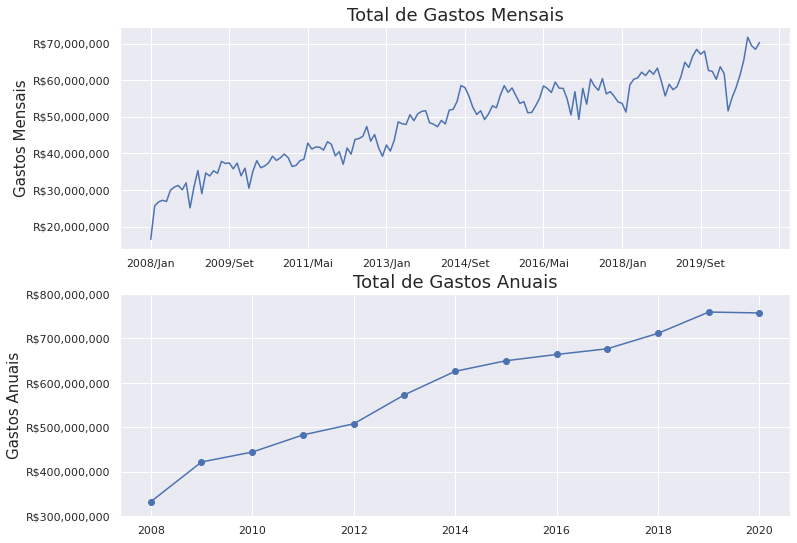

In [38]:
fig, ax = plt.subplots(2, 1, figsize = (12,9))

dados_gastos.loc['Total'].drop('Total').plot(ax = ax[0])
dados_gastos_ano.loc['Total'].drop('Total').plot(ax = ax[1], marker = 'o')

ax[0].set_title('Total de Gastos Mensais', fontsize = 18)
ax[1].set_title('Total de Gastos Anuais', fontsize = 18)

ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))

ax[0].set_ylabel('Gastos Mensais', fontsize = 15)
ax[1].set_ylabel('Gastos Anuais', fontsize = 15)

ax[1].set_ylim(300000000, 800000000)

plt.show()

Também é interessante alterarmos o tipo de tabela utilizado para demonstrar os gráficos de gastos anuais, visando verificar a quantidade de 2019 - 2020.

Conforme gráfico abaixo, podemos verificar que o ano de **2019** foi o que mais teve gastos referente ao SUS no estado de Santa Catarina, com **R$759,24 milhões** gastos no ano.

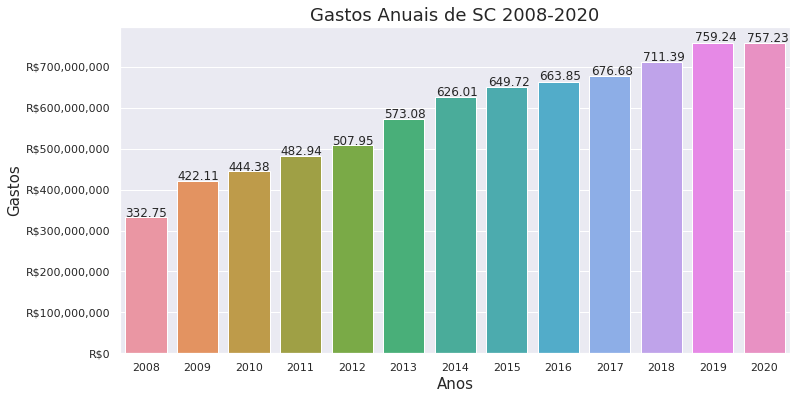

In [39]:
plt.figure(figsize = (12,6))

ax = sns.barplot(x = dados_gastos_ano.loc['Total'].drop('Total').index, y = dados_gastos_ano.loc['Total'].drop('Total').values)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))

for p in ax.patches:
    ax.annotate(str(round(p.get_height()/ 1000000, 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

ax.set_title('Gastos Anuais de SC 2008-2020', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 15)
ax.set_ylabel('Gastos', fontsize = 15)

plt.show()

####**Demonstrar a evolução dos gastos ao longo dos anos dos 10 maiores gastos.**

Também é interessante verificar no gráfico de gastos anuais dos muninícipios que mais gastaram, essa crescente de 2008 à 2020.

No gráfico, também conseguimos identificar que as cidades de **Joinville, Cricíuma, Chapecó e Rio do Sul** não seguiram o padrão da diminuição dos gastos de **2019** para **2020**.

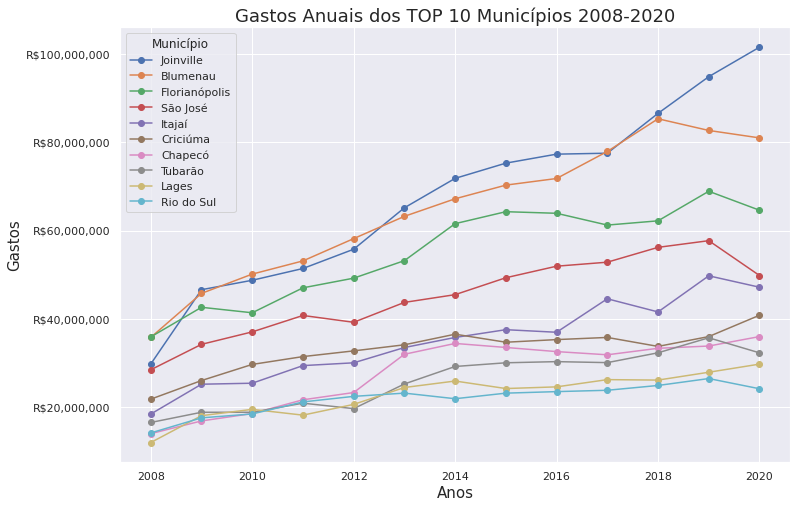

In [40]:
dados_gastos_anos_10 = dados_gastos_ano.drop('Total').sort_values(by = 'Total', ascending = False).drop('Total', axis = 1)[:10]

fig, ax = plt.subplots(1, 1, figsize = (12,8))
dados_gastos_anos_10.T.plot(ax = ax, marker = 'o')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))

ax.set_title('Gastos Anuais dos TOP 10 Municípios 2008-2020', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 15)
ax.set_ylabel('Gastos', fontsize = 15)

plt.show()

###**4.2 Análise Exploratória Dados População**

Finalizada a análise exploratória na tabela de gastos, iremos realizar uma análise em nossos dados de população.

Teremos como objetivo da análise as seguintes situações :
- **Demonstrar quais os 20 municípios com a maior população (2020).**
- **Demonstrar a evolução da população dos 10 municípios com a maior população durante os anos (2008-2020)** 

####**Demonstrar quais os 20 municípios com a maior população (2020).**

Conforme podemos verificar no gráfico abaixo, os 10 municípios de Santa Catarina com maior população são : 
- Joinville
- Florianópolis
- Blumenau
- São José
- Chapecó
- Itajaí
- Criciúma
- Jaraguá do Sul
- Lages
- Balneário Camboriú

Em comparação com a lista de gastos, possuímos **8 municípios** que estão na lista de 10 maiores gastos e maiores população.

Isso demonstra que possuímos uma **correlação positiva entre gastos e população**, possuíndo uma tendência de aumentar os gastos à medida que a população aumenta.

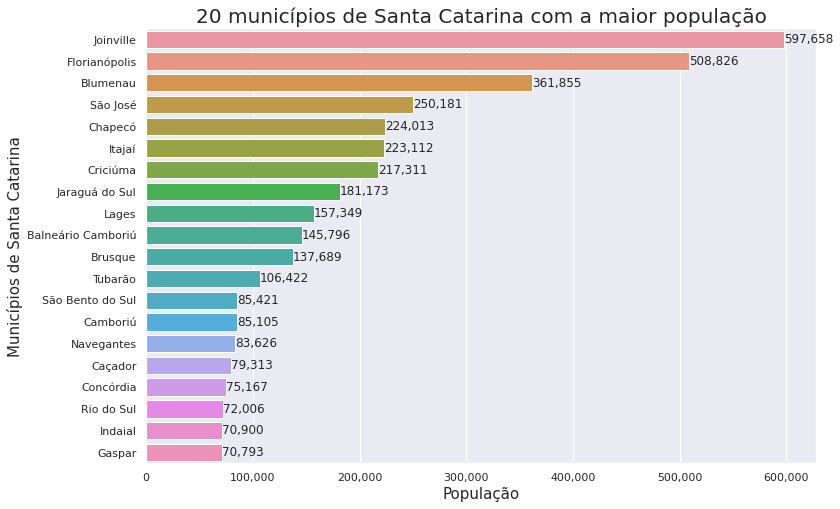

In [41]:
dados_populacao_20 = dados_populacao.drop('Total').sort_values(by = '2020', ascending=False).iloc[:20, -1:]

fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.barplot(x = '2020' , y = dados_populacao_20.index, data = dados_populacao_20)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:1,.0f}'.format(width), 
            ha = 'left',   
            va = 'center')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.set_title("20 municípios de Santa Catarina com a maior população", fontsize = 20)
ax.set_xlabel("População", fontsize = 15)
ax.set_ylabel("Municípios de Santa Catarina", fontsize = 15)

plt.show()

####**Demonstrar a evolução da população dos 10 municípios com a maior população durante os anos (2008-2020)**

Ao demonstrar a evolução da população dos 10 municípios com a maior população, podemos verificar que há uma crescente, aparentemente constante, para os municípios, exceto Lages, que acabou apresentando uma queda na população, sendo ultrapassado por Jaraguá do Sul em 2014 para 2015.

Uma explicação que foi dada em uma [matéria de 2010 pela Associação dos Municípios da Região Serrana](https://www.amures.org.br/noticias/index/ver/codMapaItem/41771/codNoticia/116288) informou que houve um encolhimento da população serrana no Censo/2010, muito provavelmente pela falta de oportunidade de trabalho associada à invasão de atividades de monocultura como o pinus.

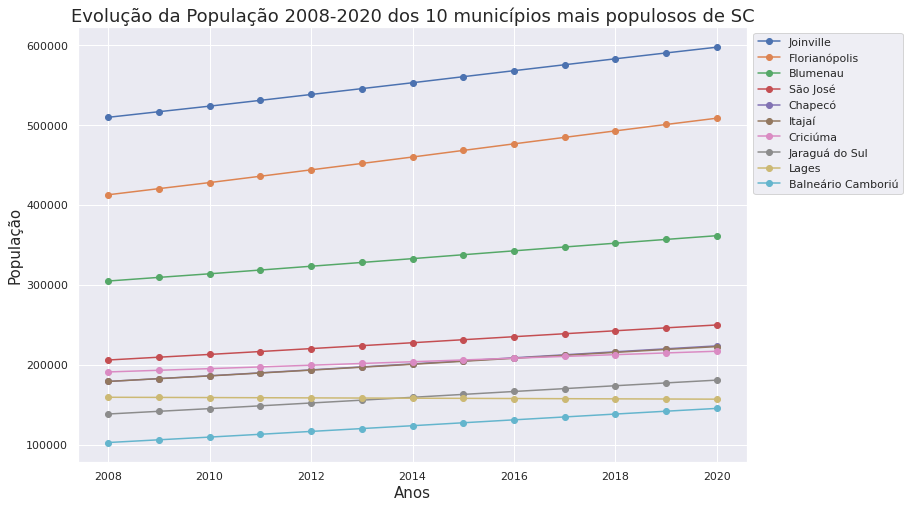

In [42]:
dados_populacao_10 = dados_populacao.drop('Total').sort_values(by = '2020', ascending = False)[:10]

fig, ax = plt.subplots(1,1, figsize = (12,8))
dados_populacao_10.T.plot(marker = 'o', ax = ax)

ax.legend(loc='upper right', bbox_to_anchor=(1.24, 1))

ax.set_title('Evolução da População 2008-2020 dos 10 municípios mais populosos de SC', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 15)
ax.set_ylabel('População', fontsize = 15)

plt.show()

###**4.3 Análise Exploratória Dados Óbitos**

Para a Análise Exploratória dos dados de Óbitos, vamos traçar esses seguintes objetivos :

- **Evolução dos óbitos totais mensais e anuais de SC**
- **Demonstrar qual mês possui a maior quantidade de óbitos**
- **Verificar os 20 municípios com mais óbitos de 2008 à 2020**
- **Verificar os 20 municípios com mais óbitos em 2020**
- **Evolução dos óbitos mensais dos 3 municípios com mais óbitos**
- **Evolução dos óbitos anuais dos 10 municípios com mais óbitos**

####**Evolução dos óbitos totais mensais e anuais de SC**

Conforme podemos verificar no gráfico abaixo, possuímos um aumento na quantidade de óbitos no SUS de Santa Catarina ao longo do tempo.

É importante salientar que nos gráficos ao longo do tempo, possuímos picos de altas e baixas em óbitos.

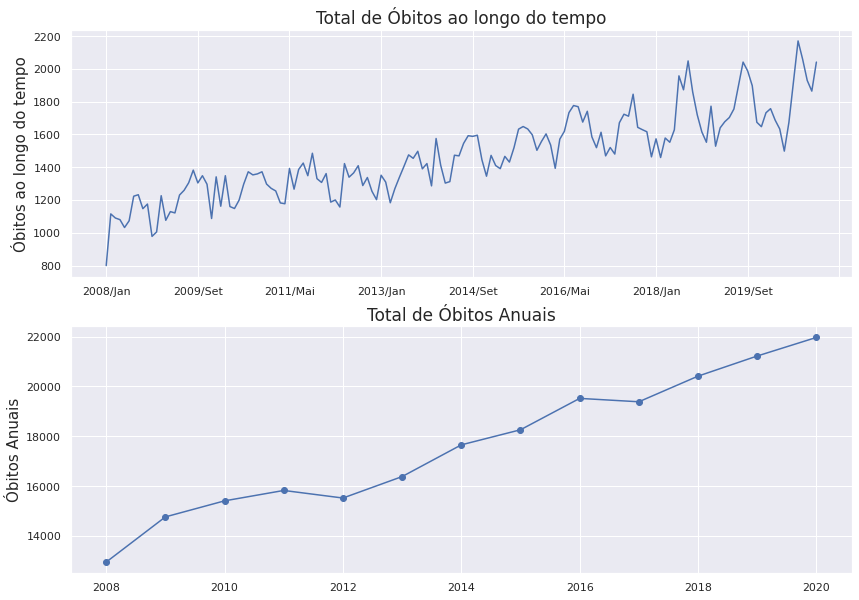

In [43]:
fig, ax = plt.subplots(2,1, figsize = (14,10))

dados_obitos.loc['Total'].drop('Total').plot(ax = ax[0])
dados_obitos_ano.loc['Total'].drop('Total').plot(ax = ax[1], marker = 'o')

ax[0].set_title('Total de Óbitos ao longo do tempo', fontsize = 17)
ax[1].set_title('Total de Óbitos Anuais', fontsize = 17)

ax[0].set_ylabel("Óbitos ao longo do tempo", fontsize = 15)
ax[1].set_ylabel("Óbitos Anuais", fontsize = 15)


plt.show()

####**Verificar os 20 municípios com mais óbitos de 2008 à 2020**

Ao realizar a análise dos 10 municípios com mais óbitos de 2008 à 2020, podemos notar que possuímos **9 municípios** que também estão presentes como os 10 municípios com maior população.

- Joinville
- Florianópolis
- Blumenau
- Criciúma
- Itajaí
- Tubarão
- Chapecó
- Lages
- São José
- Jaraguá do Sul

Podemos identificar como ponto negativo, a cidade de Tubarão, que está em 12º como maior população de Santa Catarina, mas se encontra em 6º lugar como maior número de mortes totais de 2008 à 2020.

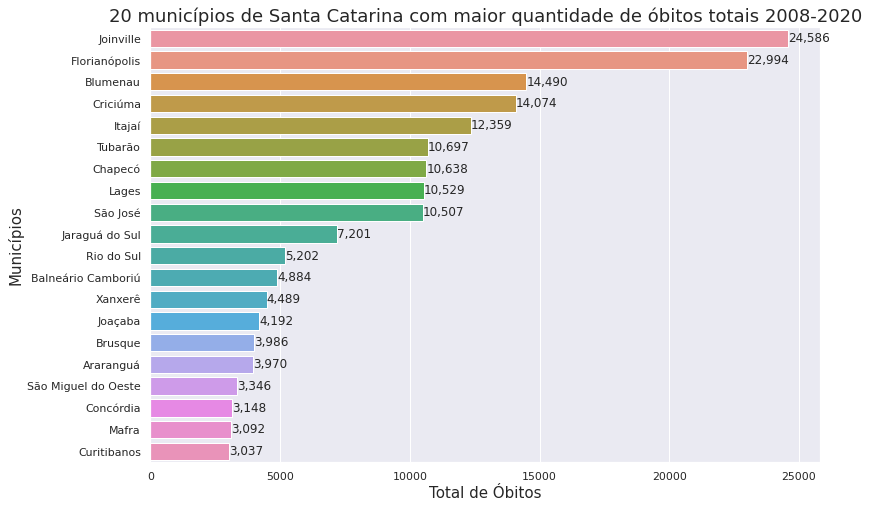

In [44]:
dados_obitos_20 = dados_obitos.drop('Total').sort_values(by = 'Total', ascending = False)[:20]

fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.barplot(x = 'Total' , y = dados_obitos_20.index, data = dados_obitos_20)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:1,.0f}'.format(width), 
            ha = 'left',   
            va = 'center')

ax.set_title("20 municípios de Santa Catarina com maior quantidade de óbitos totais 2008-2020", fontsize = 18)
ax.set_xlabel("Total de Óbitos", fontsize = 15)
ax.set_ylabel("Municípios", fontsize = 15)
plt.show()

####**Verificar os 20 municípios com mais óbitos em 2020**

Ao realizar a análise dos óbitos em 2020 comparados com os óbitos totais de 2008-2020, podemos identificar que os 10 municípios com mais óbitos são os mesmos, apenas alterando suas posições.

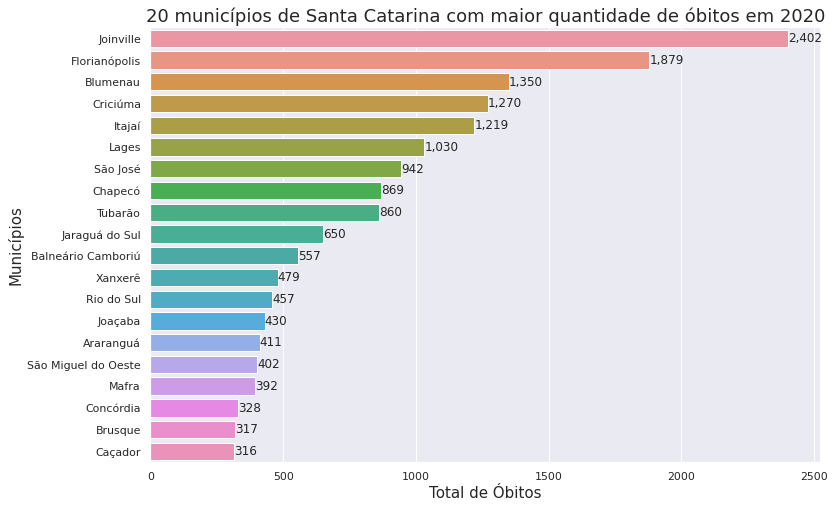

In [45]:
dados_obitos_20_2020 = dados_obitos_ano.drop('Total').sort_values(by = '2020', ascending = False)[:20]

fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.barplot(x = '2020' , y = dados_obitos_20_2020.index, data = dados_obitos_20_2020)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:1,.0f}'.format(width), 
            ha = 'left',   
            va = 'center')

ax.set_title("20 municípios de Santa Catarina com maior quantidade de óbitos em 2020", fontsize = 18)
ax.set_xlabel("Total de Óbitos", fontsize = 15)
ax.set_ylabel("Municípios", fontsize = 15)
plt.show()

####**Evolução dos óbitos mensais dos 3 municípios com mais óbitos**

Também é interessante demonstrarmos a evolução dos óbitos ao longo do tempo dos municípios que possuem o maior número de mortes, onde podemos identificar picos em 2009 (Pandemia H1N1) e 2020 (Pandemia Covid-19) na cidade de Joinville.

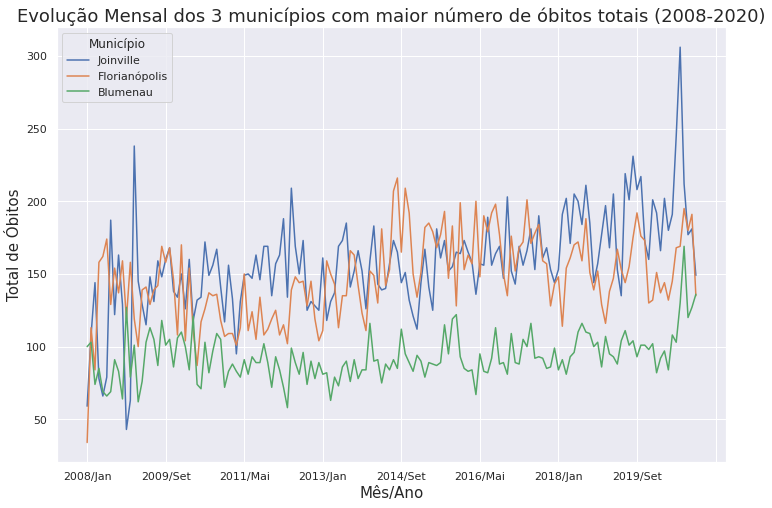

In [46]:
dados_obitos_3_mensal = dados_obitos_20[:3].drop('Total', axis = 1)

fig, ax = plt.subplots(1,1, figsize = (12,8))
dados_obitos_3_mensal.T.plot(ax = ax)

ax.set_title("Evolução Mensal dos 3 municípios com maior número de óbitos totais (2008-2020)", fontsize = 18)
ax.set_xlabel("Mês/Ano", fontsize = 15)
ax.set_ylabel("Total de Óbitos", fontsize = 15)

plt.show()

####**Evolução dos óbitos anuais dos 10 municípios com mais óbitos**

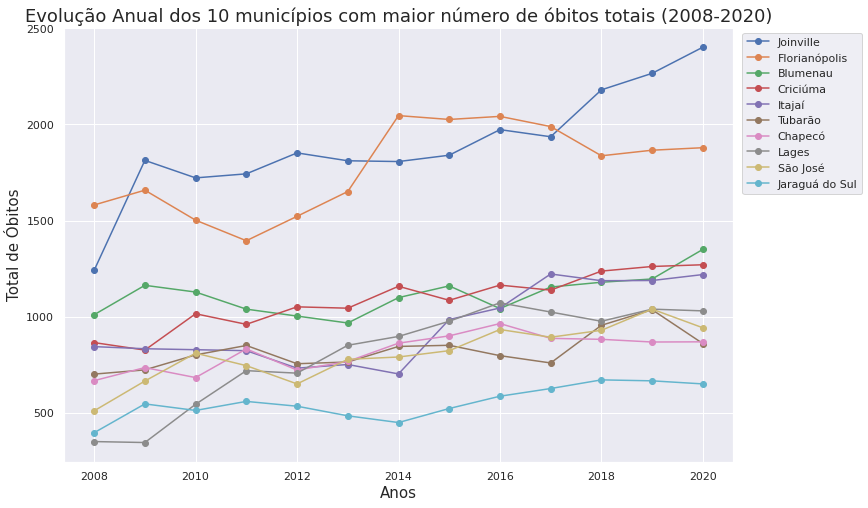

In [47]:
dados_obitos_10_anual = dados_obitos_ano.drop('Total').sort_values(by = 'Total', ascending = False).drop('Total', axis = 1)[:10]

fig, ax = plt.subplots(1,1, figsize = (12,8))
dados_obitos_10_anual.T.plot(ax = ax, marker = "o")

ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

ax.set_title("Evolução Anual dos 10 municípios com maior número de óbitos totais (2008-2020)", fontsize = 18)
ax.set_xlabel("Anos", fontsize = 15)
ax.set_ylabel("Total de Óbitos", fontsize = 15)

plt.show()

###**4.4 Análise Exploratória Dados Internações**

Para a Análise Exploratória dos Dados de Internações dos Municípios de Santa Catarina, vamos ter como objetivo os seguintes tópicos :

- **Evolução das internações totais mensais e anuais de SC**
- **Verificar os 20 municípios com mais internações de 2008 à 2020**
- **Verificar os 20 municípios com mais internações em 2020**
- **Evolução das internações mensais dos 3 municípios com mais internações**
- **Evolução das internações anuais dos 10 municípios com mais internações**

####**Evolução das internações totais mensais e anuais de SC**

Ao realizar a análise das internações totais mensais e anuais de Santa Catarina, podemos identificar uma crescente nos números de internações de 2008 à 2019 e uma grande redução para 2020 (88.120 internações à menos que 2019).

**Muito estranho para um ano que teve a chegada da pandemia no Brasil, não é mesmo?**

Estive realizando algumas pesquisas referente à essa questão e infelizmente não cheguei à uma conclusão para essa situação. 

Porém, possuo 3 hipóteses para essa diminuição :

- **Os dados de internações por COVID-19 não estão sendo acrescentados nos dados de internações devido à separação entre UTI geral e UTI covid.**
- **Os dados de internações não foram 100% computados devido serem dados muito recentes**.
- **Ocorreu uma diminuição das internações devido aos combates ao covid-19, como máscara, alcool-gel, distanciamento, etc... que podem evitar a propagação de outras doenças infecciosas.**

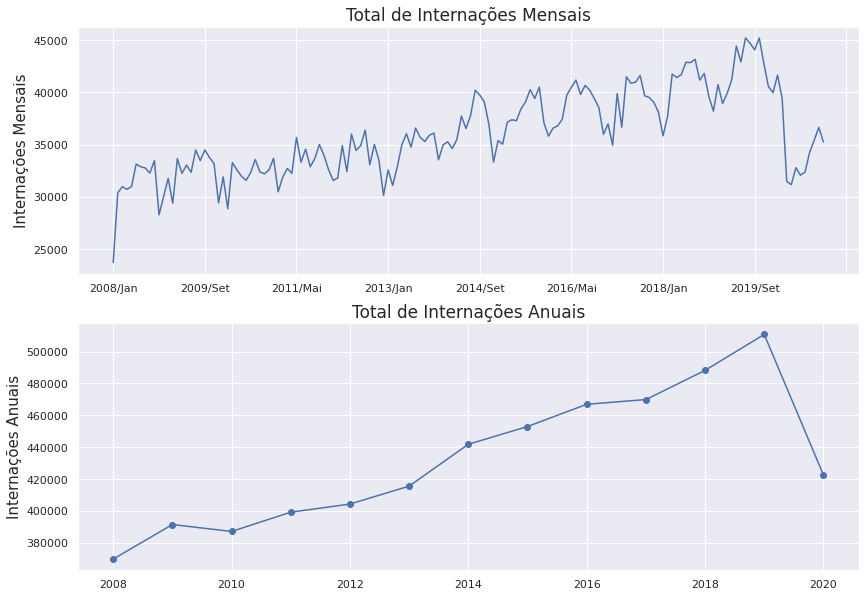

In [48]:
fig, ax = plt.subplots(2,1, figsize = (14,10))

dados_internacoes.loc['Total'].drop('Total').plot(ax = ax[0])
dados_internacoes_ano.loc['Total'].drop('Total').plot(ax = ax[1], marker = 'o')

ax[0].set_title('Total de Internações Mensais', fontsize = 17)
ax[1].set_title('Total de Internações Anuais', fontsize = 17)

ax[0].set_ylabel("Internações Mensais", fontsize = 15)
ax[1].set_ylabel("Internações Anuais", fontsize = 15)

plt.show()

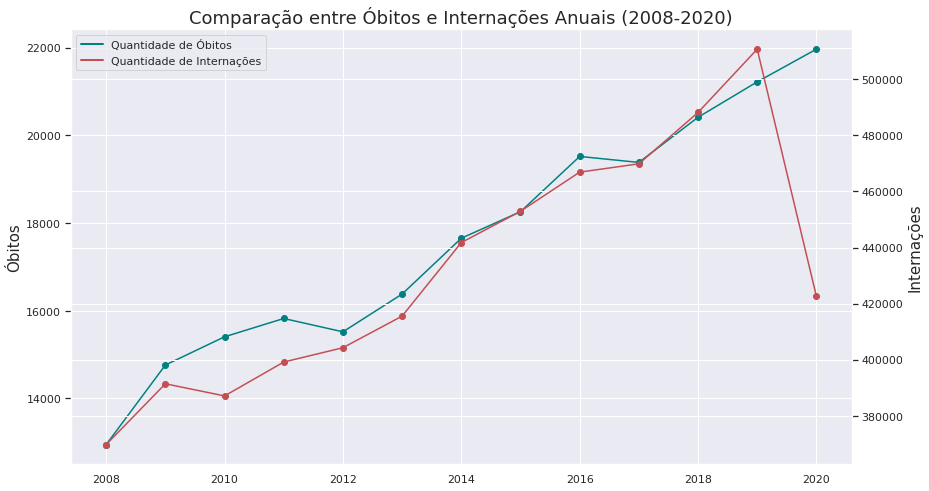

In [49]:
fig, ax = plt.subplots(figsize = (14, 8))

ax = dados_obitos_ano.loc['Total'].drop('Total').plot(marker = 'o', color = 'teal')
ax2 = ax.twinx()
ax2 = dados_internacoes_ano.loc['Total'].drop('Total').plot(marker = 'o', color = 'r')

custom_lines = [lines.Line2D([0], [0], color = 'teal', lw = 2), lines.Line2D([0], [0], color = 'r', lw = 2)]
ax.legend(custom_lines, ['Quantidade de Óbitos', 'Quantidade de Internações'])

ax.set_title("Comparação entre Óbitos e Internações Anuais (2008-2020)", fontsize = 18)
ax.set_ylabel("Óbitos", fontsize = 15)
ax2.set_ylabel("Internações", fontsize = 15)

plt.show()

####**Verificar os 20 municípios com mais internações de 2008 à 2020**

Ao realizar a análise dos 20 municípios com mais internações de 2008 à 2020 podemos identificar que os 10 municípios com maiores internações também são os 10 municípios com maior número de óbitos e 9 (exceto Tubarão) estão presentes entre as 10 maiores populações de Santa Catarina.

- Florianopolis
- Joinville
- Blumenau
- São José
- Chapecó
- Itajaí
- Criciúma
- Lages
- Tubarão
- Jaraguá do Sul

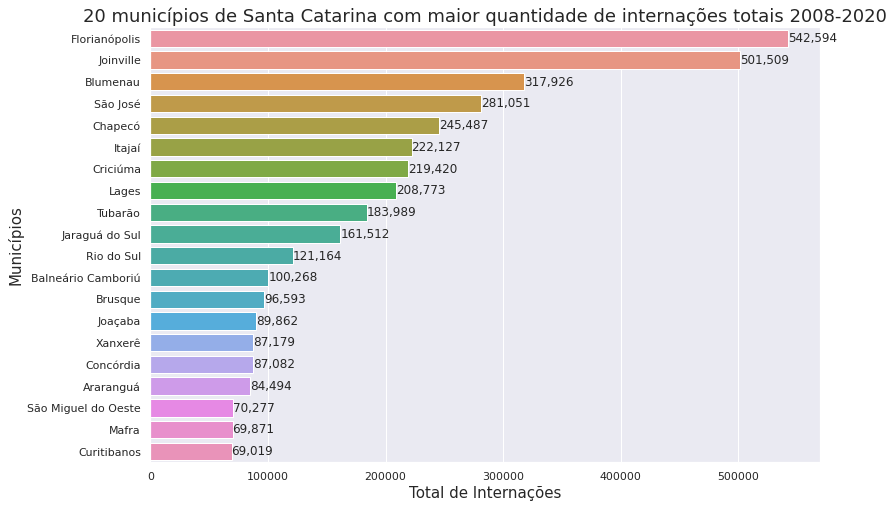

In [50]:
dados_internacoes_20 = dados_internacoes.drop('Total').sort_values(by = 'Total', ascending = False)[:20]

fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.barplot(x = 'Total' , y = dados_internacoes_20.index, data = dados_internacoes_20)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:1,.0f}'.format(width), 
            ha = 'left',   
            va = 'center')

ax.set_title("20 municípios de Santa Catarina com maior quantidade de internações totais 2008-2020", fontsize = 18)
ax.set_xlabel("Total de Internações", fontsize = 15)
ax.set_ylabel("Municípios", fontsize = 15)

plt.show()

####**Verificar os 20 municípios com mais internações em 2020**

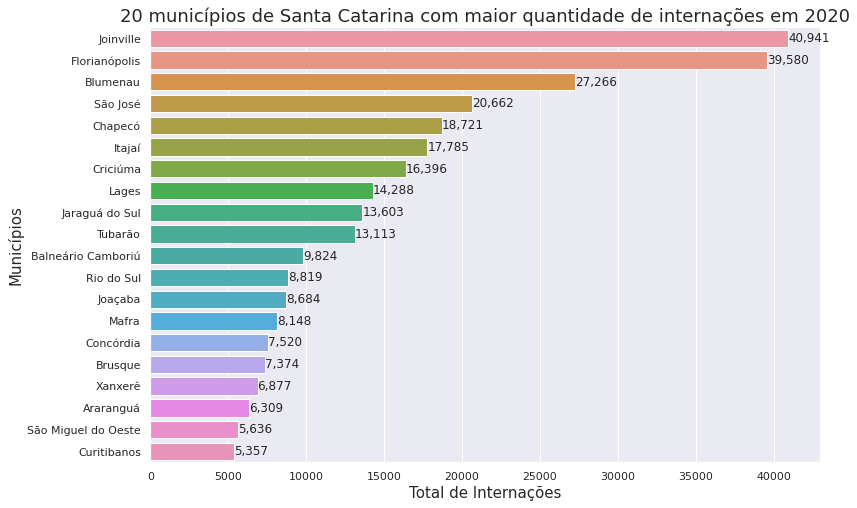

In [51]:
dados_internacoes_20_2020 = dados_internacoes_ano.drop('Total').sort_values(by = '2020', ascending = False)[:20]

fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.barplot(x = '2020' , y = dados_internacoes_20_2020.index, data = dados_internacoes_20_2020)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:1,.0f}'.format(width), 
            ha = 'left',   
            va = 'center')
    
ax.set_title("20 municípios de Santa Catarina com maior quantidade de internações em 2020", fontsize = 18)
ax.set_xlabel("Total de Internações", fontsize = 15)
ax.set_ylabel("Municípios", fontsize = 15)

plt.show()

####**Evolução das internações mensais dos 3 municípios com mais internações**

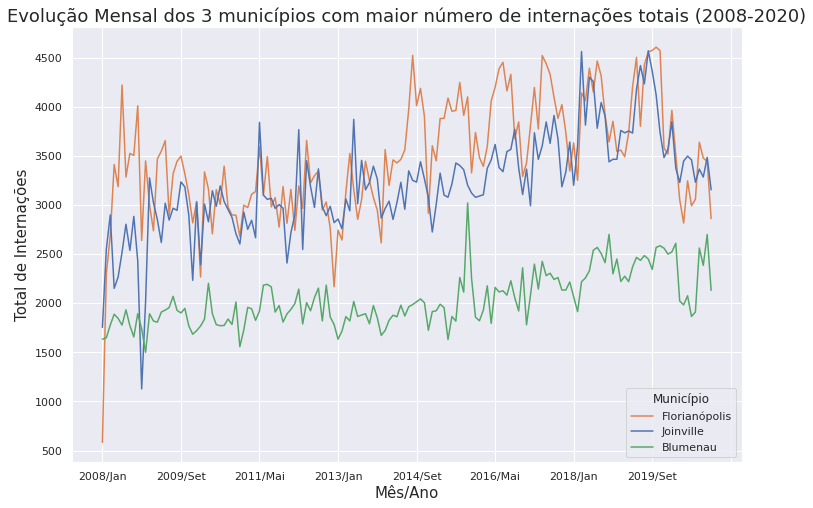

In [52]:
dados_internacoes_3_mensal = dados_internacoes_20[:3].drop('Total', axis = 1)

fig, ax = plt.subplots(1,1, figsize = (12,8))
dados_internacoes_3_mensal.T.plot(ax = ax, color = ['#DD8452', '#4F74B1', 'g' ])

ax.set_title("Evolução Mensal dos 3 municípios com maior número de internações totais (2008-2020)", fontsize = 18)
ax.set_xlabel("Mês/Ano", fontsize = 15)
ax.set_ylabel("Total de Internações", fontsize = 15)

plt.show()

####**Evolução das internações anuais dos 10 municípios com mais internações**

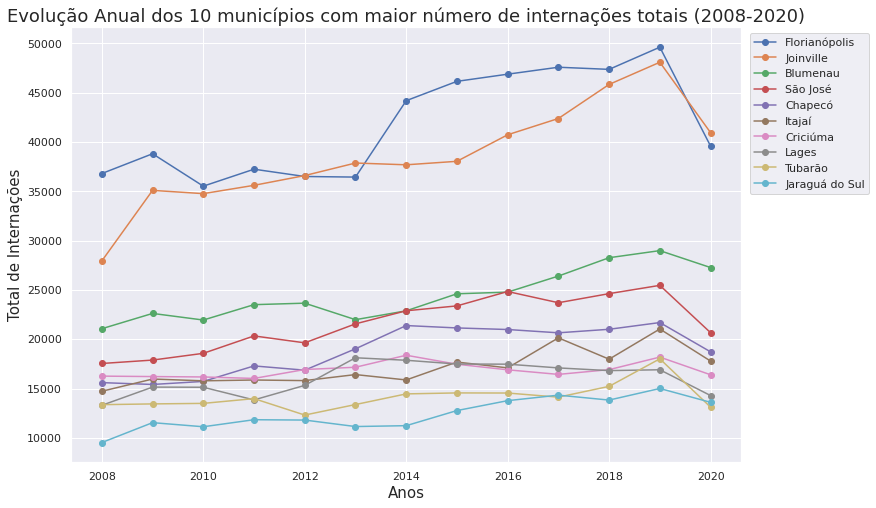

In [53]:
dados_internacoes_10_anual = dados_internacoes_ano.drop('Total').sort_values(by = 'Total', ascending = False).drop('Total', axis = 1)[:10]

fig, ax = plt.subplots(1,1, figsize = (12,8))
dados_internacoes_10_anual.T.plot(ax = ax, marker = "o")

ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

ax.set_title("Evolução Anual dos 10 municípios com maior número de internações totais (2008-2020)", fontsize = 18)
ax.set_xlabel("Anos", fontsize = 15)
ax.set_ylabel("Total de Internações", fontsize = 15)

plt.show()

##**5. Criação de Hipóteses**

Finalizada a etapa de exploração e demonstração dos dados das nossas tabelas, chegou a hora de formularmos hipóteses à respeito dos nossos dados.

A formulação de hipóteses é uma etapa muito importante para termos novas visões à cerca dos dados.

Para essa etapa, iremos nos concentrar nas seguintes hipóteses :

- **Existe alguma relação entre população, óbitos, internações e gastos totais?**
- **Estados com mais população possuem um gasto por pessoa maior?**
- **Em épocas de eleição é verificado um aumento nos gastos totais?**
- **Possuímos mais mortes e internações no inverno devido ao frio e diminuição da imunidade?**

####**Existe alguma relação entre população, óbitos, internações e gastos totais?**

Para verificar essa questão, primeiro iremos realizar a criação de uma tabela anual com os dados totais de ```População```, ```Gastos```, ```Internações``` e ```Óbitos```.

In [54]:
todos_valores_anuais = pd.DataFrame(
                       {'População' : dados_populacao.loc['Total'],
                        'Gastos' : dados_gastos_ano.loc['Total'].drop('Total'),
                        'Internacoes' : dados_internacoes_ano.loc['Total'].drop('Total'),
                        'Obitos' : dados_obitos_ano.loc['Total'].drop('Total')})

todos_valores_anuais

,População,Gastos,Internacoes,Obitos
2008,5348990,332747333.49,369749,12950
2009,5422256,422107491.92,391421,14763
2010,5494769,444376400.13,387083,15407
2011,5570411,482941267.30,399178,15824
2012,5646843,507951182.58,404281,15520
2013,5701927,573083638.11,415552,16381
2014,5778645,626008038.37,441783,17654
2015,5857216,649716373.14,452952,18259
2016,5935459,663853492.72,466898,19519
2017,6012788,676676323.29,469868,19383


Como queremos demonstrar as 4 informações em um gráfico de tempo anual (TimeSeries), podemos verificar na imagem abaixo que apenas as informações de gastos são demonstradas.

**Mas por que isso ocorre?**

Isso ocorre devido ao valor dos gastos estar situado nas casas dos milhões (entre 300 e 760), possuíndo valores muito altos comparados com as outras colunas.

Essa diferença pode ser verificada na tabela acima dessa célula.

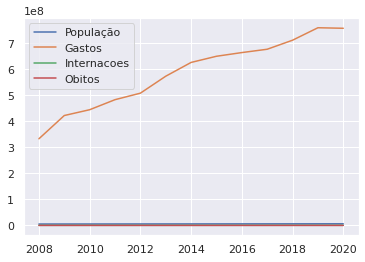

In [55]:
todos_valores_anuais.plot()
plt.show()

Para realizar a alteração dos nossos dados para trabalharem na mesma escala, vou seguir com a ideia de comparar as proporções de aumento à partir do valor minímo de cada coluna.

Essa ideia indica que o nosso valor mínimo de cada coluna é considerado 1.00 (valor 100%) e os aumentos dos valores são, por exemplo, 1.22 (22% à mais que o mínimo), 2.28 (128% à mais que o mínimo).

In [56]:
prop_min = pd.DataFrame()
for column in todos_valores_anuais.columns :
  prop_min[column] = todos_valores_anuais[column] / todos_valores_anuais[column].min()

In [57]:
prop_min

,População,Gastos,Internacoes,Obitos
2008,1.00,1.00,1.00,1.00
2009,1.01,1.27,1.06,1.14
2010,1.03,1.34,1.05,1.19
2011,1.04,1.45,1.08,1.22
2012,1.06,1.53,1.09,1.20
2013,1.07,1.72,1.12,1.26
2014,1.08,1.88,1.19,1.36
2015,1.10,1.95,1.23,1.41
2016,1.11,2.00,1.26,1.51
2017,1.12,2.03,1.27,1.50


Finalizada a criação da tabela das proporções à partir do valor minímo, podemos realizar a criação do nosso gráfico para analisar os crescimentos de nossos valores.

Conforme podemos verificar abaixo, os nossos valores mínimos são encontrados no ano de **2008** e seguem um **crescimento** em conjunto até o ano de **2019**.

No ano de 2020, podemos notar que houve uma diminuição no número de internações e também no número de gastos (análises que já realizamos anteriormente para cada tabela de dados).

Então, podemos dizer que **existe** uma correlação entre ```População```, ```Óbitos```, ```Internações``` e ```Gastos```, como por exemplo :
- A medida que a população aumenta possuímos um maior número de gastos.
- Quando tivemos um maior número de internações possuímos um maior número de óbitos.

Lembrando que isso demonstra uma **correlação** e não implica **causalidade**.

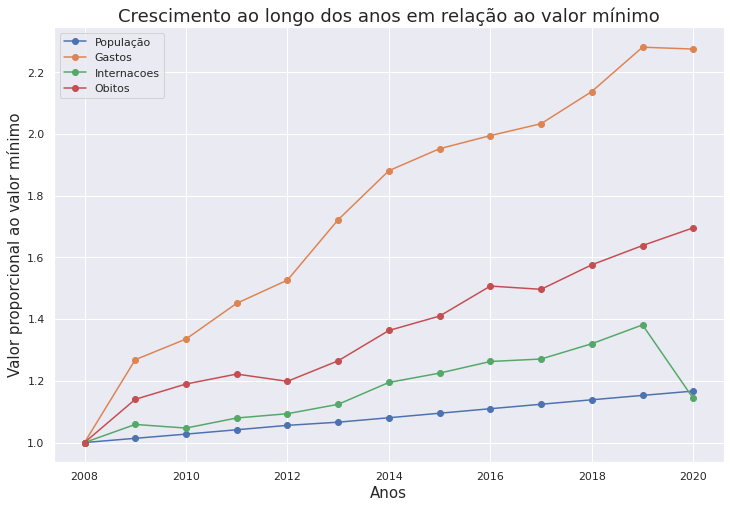

In [58]:
fig, ax = plt.subplots(1,1, figsize = (12,8))
prop_min.plot(ax = ax, marker = 'o')


ax.set_title("Crescimento ao longo dos anos em relação ao valor mínimo", fontsize = 18)
ax.set_xlabel("Anos", fontsize = 15)
ax.set_ylabel('Valor proporcional ao valor mínimo', fontsize = 15)

plt.show()

####**Estados com mais população possuem um gasto por população maior?**

Para verificar essa questão, iremos realizar a criação de uma tabela de gasto por população do ano de 2020. 

Isso significa que realizaremos a divisão dos valores de gastos pela população de cada município.

In [59]:
gasto_por_populacao_2020 = (dados_gastos_ano['2020'] / dados_populacao['2020']).sort_values(ascending = False)[:20]

Após realizar a criação da tabela, podemos realizar a criação do nosso gráfico e conseguimos chegar a conclusão que **estados com a maior população não possuem um gasto por população maior**.

Conforme podemos verificar abaixo, apenas a cidade de **Blumenau** se encontra em ambas as listas.

**População** : Joinville - Florianópolis - Blumenau - São José - Chapecó - Itajaí - Criciúma - Jaraguá do Sul - Lages - Balneário Camboriú

**Gasto por População** : Joaçaba - Xanxerê - Rio do Sul - Tubarão - Mafra - Ibirama - Blumenau - Itajaí - Curitibanos - São Miguel do Oeste

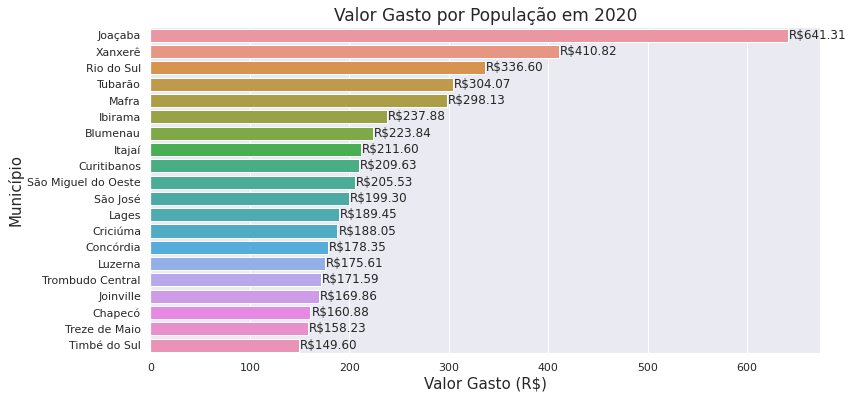

In [60]:
fig, ax = plt.subplots(1, 1, figsize = (12,6))
sns.barplot(x = gasto_por_populacao_2020.values, y = gasto_por_populacao_2020.index)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            'R${:1,.2f}'.format(width), 
            ha = 'left',   
            va = 'center')
    
ax.set_title("Valor Gasto por População em 2020", fontsize = 17)
ax.set_xlabel("Valor Gasto (R$)", fontsize = 15)
ax.set_ylabel("Município", fontsize = 15)

plt.show()

####**Em épocas de eleições municípais é verificado um aumento nos gastos totais?**

Conforme podemos verificar abaixo, **não conseguimos identificar um pico maior nos meses dos anos de eleição municipal (2008, 2012, 2016 e 2020)**.

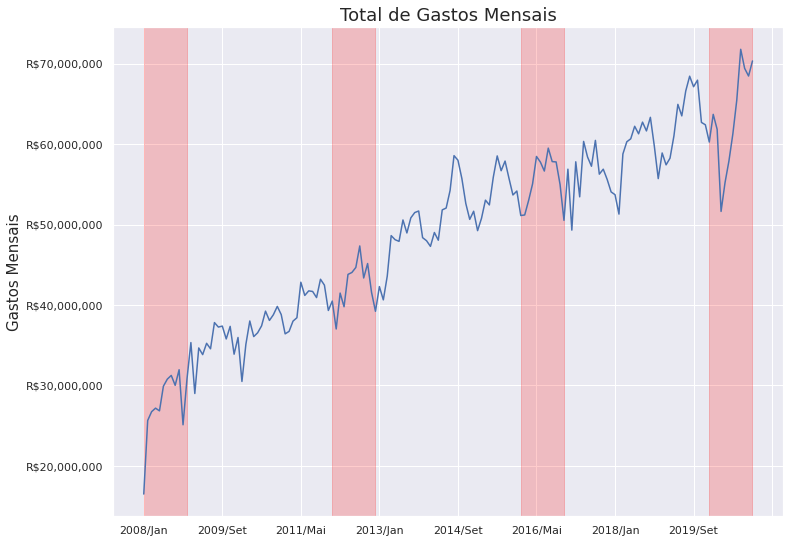

In [61]:
fig, ax = plt.subplots(1, 1, figsize = (12,9))

dados_gastos.loc['Total'].drop('Total').plot(ax = ax)

ax.set_title('Total de Gastos Mensais', fontsize = 18)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.0f}'))
ax.set_ylabel('Gastos Mensais', fontsize = 15)

for month in range(0, 192, 48):
    plt.axvspan(month, month+11, color='red', alpha=0.2)

plt.show()

####**Possuímos mais mortes e internações no inverno devido ao frio e diminuição da imunidade?**

Podemos verificar no gráfico abaixo, que possuímos uma **maior quantidade de óbitos** que ocorrem entre os meses de **Junho e Setembro** (Período de Inverno no Brasil), possuíndo um **pico em Agosto**.

Essa alta quantidade pode ser entendida pela chegada do Inverno em nosso país, trazendo uma diminuição na temperatura e na imunidade do nosso organismo e um aumento nas quantidades de doenças, como gripes.

Também é importante destacar, conforme matéria do [Dr.Drauzio Varella](https://drauziovarella.uol.com.br/cardiovascular/numero-de-casos-de-infarto-e-avc-aumenta-no-frio/), que os números de casos de infarto e AVC aumentam no frio.

Realizando a análise do **Total de Internações** podemos identificar também uma **grande alta no inverno (possuíndo o maior valor em Agosto)**, mas verificamos também um alto valor no mês de Outubro.

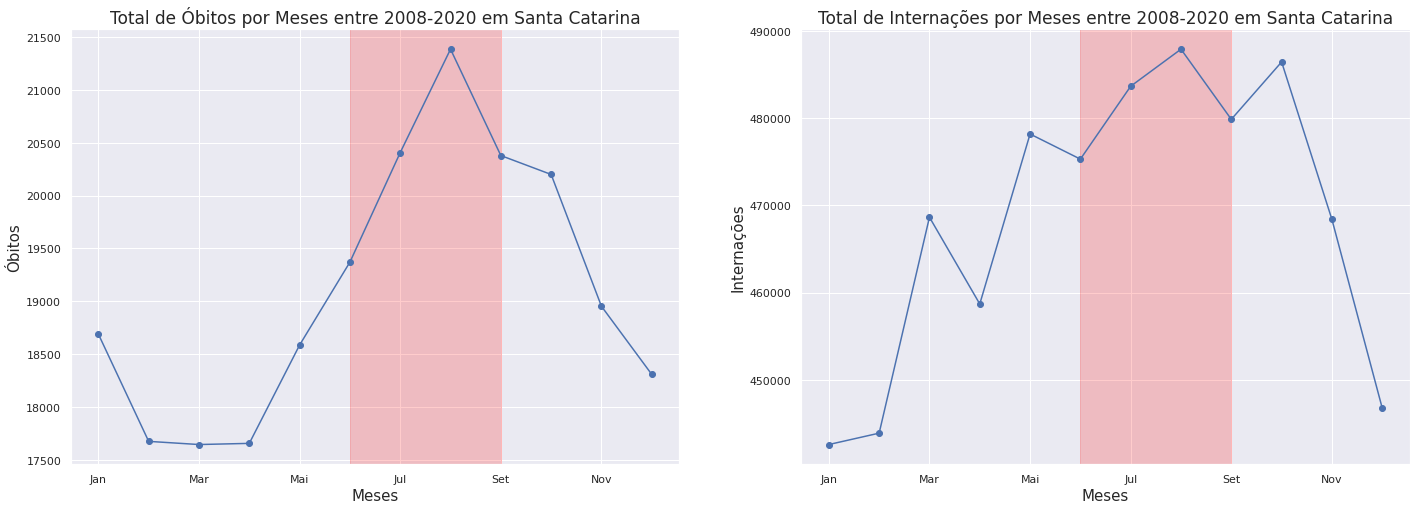

In [62]:
fig, ax = plt.subplots(1,2, figsize = (24,8))

dados_obitos_mes.loc['Total'].plot(marker = 'o', ax = ax[0])
ax[0].set_title('Total de Óbitos por Meses entre 2008-2020 em Santa Catarina', fontsize = 17)
ax[0].set_xlabel('Meses', fontsize = 15)
ax[0].set_ylabel("Óbitos", fontsize = 15)

dados_internacoes_mes.loc['Total'].plot(marker = 'o', ax = ax[1])
ax[1].set_title('Total de Internações por Meses entre 2008-2020 em Santa Catarina', fontsize = 17)
ax[1].set_xlabel('Meses', fontsize = 15)
ax[1].set_ylabel("Internações", fontsize = 15)


ax[0].axvspan(5,8, color = 'red', alpha = 0.2)
ax[1].axvspan(5,8, color = 'red', alpha = 0.2)  

plt.show()

##**6. Conclusão**

Esse projeto foi muito interessante para a aprendizagem de como utilizar o TABNET para a aquisição dos dados do DataSUS, além de desenvolver habilidades em normalização dos dados e geração de gráficos.

Com a Análise Exploratória, conseguimos identificar uma tendência de crescente de 2008 à 2020 para os nossos dados de população, óbitos, internações e gastos.

Também foi interessante à identificação de quais municípios possuem os maiores valores (Joinville, Florianópolis e Blumenau são os 3 principais). 

Verificamos também uma diminuição na população de Lages, além de os dados de internação de 2020 estarem muito inferiores aos de 2019.

Com o desenvolvimento das hipóteses, verificamos que anos de eleição não influenciam nos gastos do SUS de cada munícipio e também identificamos um maior número de óbitos e internações no período do Inverno.

##**7. Agradecimentos**

Gostaria também de agradecer à [Alura](https://www.alura.com.br/) por trazer um tema muito importante em 2021, a área da saúde, para o Bootcamp de Data Science Aplicada 2021

Também gostaria de agradecer em especial os professores [Thiago Gonçalves](https://www.linkedin.com/in/thiago-gon%C3%A7alves-santos/) e [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/) por todo o conhecimento repassado. 

Além disso, agradecer também toda a comunidade do Discord que está sempre disposta para auxiliar e trocar experiências.